In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os, sys

# Add to path the parent directory of this notebook dir

sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np


# from rl_envs_forge.envs.grid_world.grid_world import GridWorld
from src import GridWorld

from policy_iteration import policy_evaluation_v_stochastic, find_optimal_policy_q_stochastic

from visualize import draw_simple_gridworld

In [ ]:
# TODO: build P matrix

Optimal Policy: {(0, 1): <Action.LEFT: 3>, (1, 2): <Action.DOWN: 2>, (2, 1): <Action.UP: 0>, (3, 1): <Action.RIGHT: 1>, (1, 1): <Action.UP: 0>, (0, 3): <Action.DOWN: 2>, (2, 0): <Action.UP: 0>, (3, 0): <Action.UP: 0>, (2, 3): <Action.DOWN: 2>, (0, 2): <Action.LEFT: 3>, (2, 2): <Action.RIGHT: 1>, (1, 0): <Action.UP: 0>, (3, 2): <Action.RIGHT: 1>, (1, 3): <Action.DOWN: 2>}
Value Function: {(0, 1): {<Action.UP: 0>: -2.702261740639016, <Action.RIGHT: 1>: -3.2569207696116678, <Action.DOWN: 2>: -3.152080594771172, <Action.LEFT: 3>: -1.8222526210043712}, (1, 2): {<Action.UP: 0>: -4.199164270981394, <Action.RIGHT: 1>: -4.199164270981394, <Action.DOWN: 2>: -4.094324096140899, <Action.LEFT: 3>: -4.094324096140899}, (2, 1): {<Action.UP: 0>: -4.094324096140898, <Action.RIGHT: 1>: -4.094324096140898, <Action.DOWN: 2>: -4.199164270981394, <Action.LEFT: 3>: -4.199164270981394}, (3, 1): {<Action.UP: 0>: -4.352737493454169, <Action.RIGHT: 1>: -3.6711160509132106, <Action.DOWN: 2>: -4.225775079885862, <

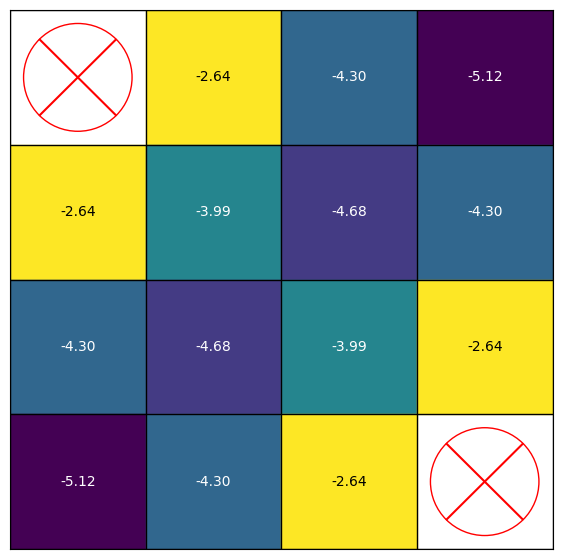

In [24]:
env = GridWorld(
    rows=4,
    cols=4,
    walls=None,
    start_state=(2, 2),
    terminal_states={(0, 0): -1, (3, 3): -1},
    rewards={
        "valid_move": -1,
        "wall_collision": -1,
        "out_of_bounds": -1,  # Added penalty for out-of-bounds
        "terminal_state": -1,  # Added reward for reaching terminal state
        "default": -1,
    },
    p_success=0.5,
)


t_r_dict = env.mdp

# Parameters for policy iteration
gamma = 0.9
theta = 1e-6

# Find the optimal policy using Q-value iteration
optimal_policy, optimal_value_function_q = find_optimal_policy_q_stochastic(t_r_dict)

print("Optimal Policy:", optimal_policy)
print("Value Function:", optimal_value_function_q)

# Extract V from Q
states = list(set([s for s, _ in t_r_dict.keys()]))
V = {state: 0 for state in states}
optimal_V = policy_evaluation_v_stochastic(states, optimal_policy, V, t_r_dict, gamma, theta)
print("Optimal Value Function:", optimal_V)

# Grid shape and walls for visualization
grid_shape = (env.rows, env.cols)
walls = env.walls  # Assuming walls are defined as a set of tuples (row, col)

# Draw the GridWorld with the optimal policy and value function
draw_simple_gridworld(
    grid_shape,
    walls,
    optimal_V,
    env.terminal_states,
    policy=None,
    enable_heatmap=True,
)

Optimal Policy: {(0, 1): <Action.LEFT: 3>, (1, 2): <Action.UP: 0>, (2, 1): <Action.UP: 0>, (4, 1): <Action.UP: 0>, (3, 1): <Action.RIGHT: 1>, (1, 1): <Action.UP: 0>, (0, 3): <Action.DOWN: 2>, (2, 0): <Action.UP: 0>, (3, 0): <Action.UP: 0>, (2, 3): <Action.DOWN: 2>, (0, 2): <Action.LEFT: 3>, (2, 2): <Action.RIGHT: 1>, (1, 0): <Action.UP: 0>, (3, 2): <Action.RIGHT: 1>, (1, 3): <Action.DOWN: 2>}
Value Function: {(0, 1): {<Action.UP: 0>: -1.0, <Action.RIGHT: 1>: -1.9, <Action.DOWN: 2>: -1.9, <Action.LEFT: 3>: 0}, (1, 2): {<Action.UP: 0>: -1.9, <Action.RIGHT: 1>: -1.9, <Action.DOWN: 2>: -1.9, <Action.LEFT: 3>: -1.9}, (2, 1): {<Action.UP: 0>: -1.9, <Action.RIGHT: 1>: -1.9, <Action.DOWN: 2>: -1.9, <Action.LEFT: 3>: -1.9}, (4, 1): {<Action.UP: 0>: -1.9, <Action.RIGHT: 1>: -2.71, <Action.DOWN: 2>: -2.71, <Action.LEFT: 3>: -2.71}, (3, 1): {<Action.UP: 0>: -2.71, <Action.RIGHT: 1>: -1.0, <Action.DOWN: 2>: -2.71, <Action.LEFT: 3>: -2.71}, (1, 1): {<Action.UP: 0>: -1.0, <Action.RIGHT: 1>: -2.71, <A

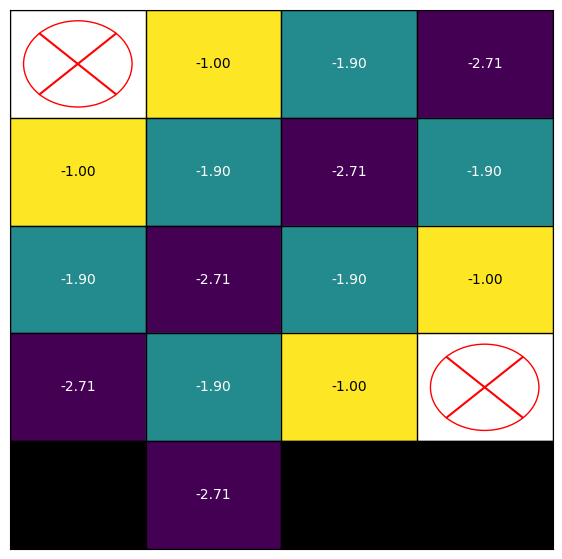

In [14]:
walls = [(4, 0), (4, 2), (4, 3)]
env = GridWorld(
    rows=5,
    cols=4,
    walls=walls,
    start_state=(2, 2),
    terminal_states={(0, 0): -1, (3, 3): -1},
    rewards={
        "valid_move": -1,
        "wall_collision": -1,
        "out_of_bounds": -1,  # Added penalty for out-of-bounds
        "terminal_state": -1,  # Added reward for reaching terminal state
        "default": -1,
    },
)

# Build the MDP representation
t_r_dict = env.mdp

# Parameters for policy iteration
gamma = 0.9
theta = 1e-6

# Find the optimal policy using Q-value iteration
optimal_policy, optimal_value_function_q = find_optimal_policy_q_stochastic(t_r_dict)

print("Optimal Policy:", optimal_policy)
print("Value Function:", optimal_value_function_q)

# Extract V from Q
states = list(set([s for s, _ in t_r_dict.keys()]))
V = {state: 0 for state in states}
optimal_V = policy_evaluation_v_stochastic(states, optimal_policy, V, t_r_dict, gamma, theta)
print("Optimal Value Function:", optimal_V)

# Grid shape and walls for visualization
grid_shape = (env.rows, env.cols)
walls = env.walls  # Assuming walls are defined as a set of tuples (row, col)

# Draw the GridWorld with the optimal policy and value function
draw_simple_gridworld(
    grid_shape,
    walls,
    optimal_V,
    env.terminal_states,
    policy=None,
    enable_heatmap=True,
)

# With random policy

In [16]:
from utils import create_random_policy, extract_V_from_Q_for_stochastic_policy
from policy_iteration import random_policy_evaluation_q_stochastic

{(0, 1): -5.277812622324071, (1, 2): -7.180609734535938, (2, 1): -7.180610013313375, (3, 1): -7.1283992975537265, (1, 1): -6.606290186020746, (0, 3): -7.6505073561324775, (2, 0): -7.128399334324278, (3, 0): -7.6505084518976165, (2, 3): -5.2778126971059915, (0, 2): -7.128398817963455, (2, 2): -6.606290193961953, (1, 0): -5.277813074303026, (3, 2): -5.277813044779663, (1, 3): -7.1283988875224695}


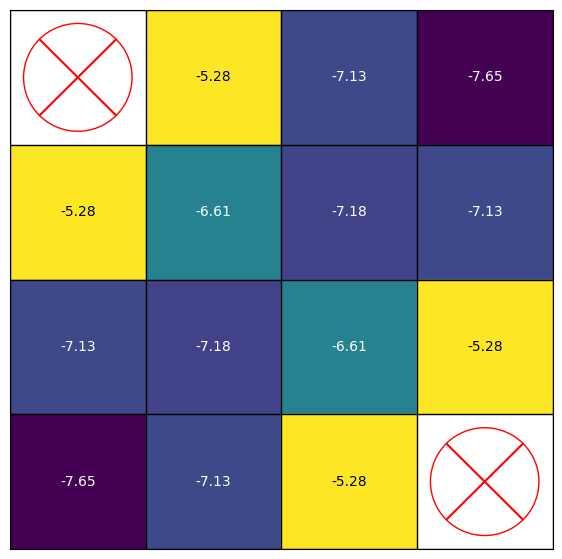

In [17]:
env = GridWorld(
    rows=4,
    cols=4,
    walls=None,
    start_state=(2, 2),
    terminal_states={(0, 0): -1, (3, 3): -1},
    rewards={
        "valid_move": -1,
        "wall_collision": -1,
        "out_of_bounds": -1,  # Added penalty for out-of-bounds
        "terminal_state": -1,  # Added reward for reaching terminal state
        "default": -1,
    },
)

# Build the MDP representation
t_r_dict = env.mdp

# Parameters for policy iteration
gamma = 0.9
theta = 1e-6

# Assuming 't_r_dict' is your transition-reward dictionary from the GridWorld environment
states = list(set([s for s, _ in t_r_dict.keys()]))
actions = list(set([a for _, a in t_r_dict.keys()]))

# Initialize Q-function
Q = {state: {action: 0 for action in actions} for state in states}

# Create a random policy
random_policy = create_random_policy(states, actions)

# Evaluate the policy
Q = random_policy_evaluation_q_stochastic(states, actions, random_policy, Q, t_r_dict, gamma=gamma, theta=theta)

# Extract the state-value function V from the Q-function
V_random_policy = extract_V_from_Q_for_stochastic_policy(Q, random_policy, states)
print(V_random_policy)

# Grid shape and walls for visualization
grid_shape = (env.rows, env.cols)
walls = env.walls  # Assuming walls are defined as a set of tuples (row, col)

# Draw the GridWorld with the optimal policy and value function
draw_simple_gridworld(
    grid_shape,
    walls,
    V_random_policy,
    env.terminal_states,
    policy=None,
    enable_heatmap=True,
)

{(0, 1): -12.365885257936696, (1, 2): -17.64258041690028, (2, 1): -18.269597981692133, (4, 1): -22.481664811180522, (3, 1): -19.349612796333524, (1, 1): -16.065476923901052, (0, 3): -19.132078717681615, (2, 0): -18.18056065524054, (3, 0): -20.373698635980375, (2, 3): -12.408307762237847, (0, 2): -17.491408087810175, (2, 2): -16.180505320408354, (1, 0): -12.59255053584724, (3, 2): -13.014889261247513, (1, 3): -17.505361067698832}


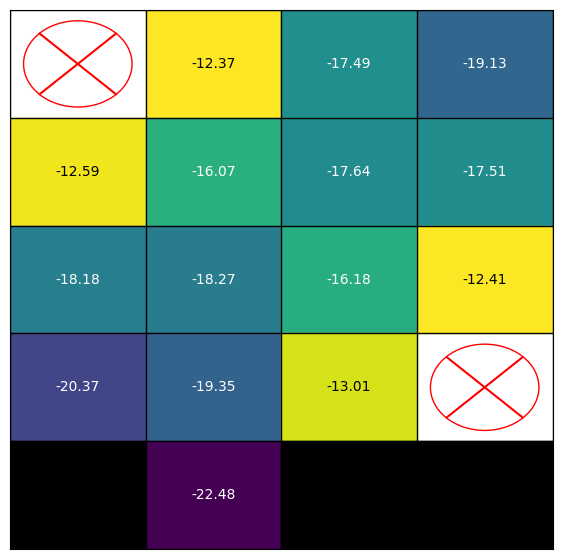

In [19]:
walls = [(4, 0), (4, 2), (4, 3)]
env = GridWorld(
    rows=5,
    cols=4,
    walls=walls,
    start_state=(2, 2),
    terminal_states={(0, 0): -1, (3, 3): -1},
    rewards={
        "valid_move": -1,
        "wall_collision": -1,
        "out_of_bounds": -1,  # Added penalty for out-of-bounds
        "terminal_state": -1,  # Added reward for reaching terminal state
        "default": -1,
    },
)

# Build the MDP representation
t_r_dict = env.mdp

# Parameters for policy iteration
gamma = 0.99
theta = 1e-6

# Assuming 't_r_dict' is your transition-reward dictionary from the GridWorld environment
states = list(set([s for s, _ in t_r_dict.keys()]))
actions = list(set([a for _, a in t_r_dict.keys()]))

# Initialize Q-function
Q = {state: {action: 0 for action in actions} for state in states}

# Create a random policy
random_policy = create_random_policy(states, actions)

# Evaluate the policy
Q = random_policy_evaluation_q_stochastic(states, actions, random_policy, Q, t_r_dict, gamma=gamma, theta=theta)

# Extract the state-value function V from the Q-function
V_random_policy = extract_V_from_Q_for_stochastic_policy(Q, random_policy, states)
print(V_random_policy)

# Grid shape and walls for visualization
grid_shape = (env.rows, env.cols)
walls = env.walls  # Assuming walls are defined as a set of tuples (row, col)

# Draw the GridWorld with the optimal policy and value function
draw_simple_gridworld(
    grid_shape,
    walls,
    V_random_policy,
    env.terminal_states,
    policy=None,
    enable_heatmap=True,
)